# Notebook for a controlled Production and Degradation Chemical Reaction Network

Production and Degradation Chemical Reaction  Network : $\emptyset \xrightleftharpoons[\xi]{\theta} S$.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN
import simulation
import training_pgd

from CRN_controlled_production_degradation import propensities_production_degradation as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'controlled_proddegr'
NUM_PARAMS = 5

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Hyperparameters

In [4]:
LR = 0.005
N_ITER  = 700
BATCHSIZE = 32
N_HIDDEN = 256
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [5]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [10]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 699/700 [08:50<00:00,  1.32it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0006686957203783095,
 Valid loss: 0.0007899249903857708


Training ...: 100%|█████████▉| 699/700 [10:05<00:00,  1.15it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0005093209911137819,
 Valid loss: 0.0006627695984207094


Training ...: 100%|█████████▉| 699/700 [09:13<00:00,  1.26it/s]

Learning rate: 2.5177519986929707e-08,
Train loss: 0.0005757628823630512,
 Valid loss: 0.0006404537707567215


In [15]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'controlled_PD_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models/controlled_PD_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models/controlled_PD_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models/controlled_PD_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [6]:
# Compute losses

print("Model 1")
print("\nTesting dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("Model 2")
print("\nTesting dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("Model 3")
print("\nTesting dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model 1

Testing dataset
KLD : 0.0008222450851462781
Hellinger : 0.012297903187572956
Model 2

Testing dataset
KLD : 0.0005496374797075987
Hellinger : 0.011163129471242428
Model 3

Testing dataset
KLD : 0.0007343505276367068
Hellinger : 0.011877733282744884


## Probability mass function

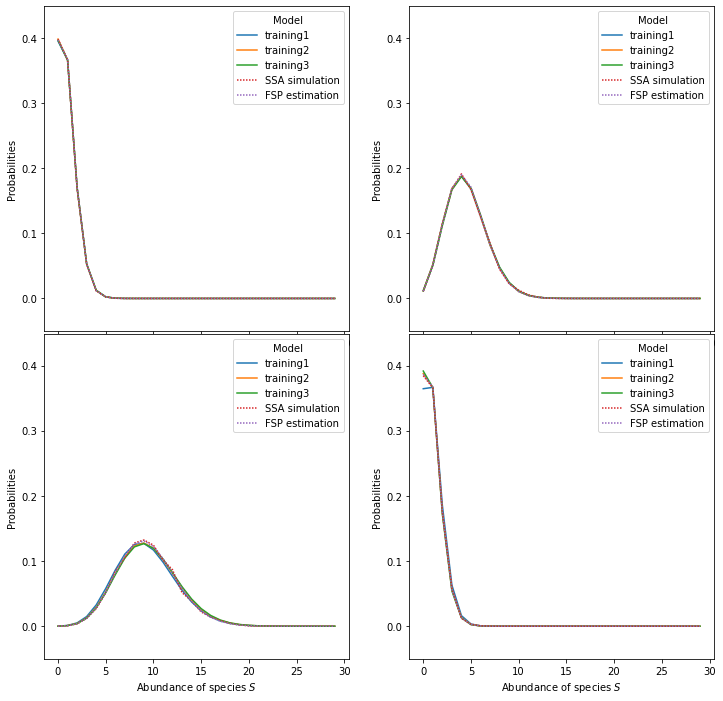

In [7]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot_test_result = (True, [y_test[1_000+k,:] for k in range(4)]),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    1, 
                                    1))

For parameters outside of the training range:

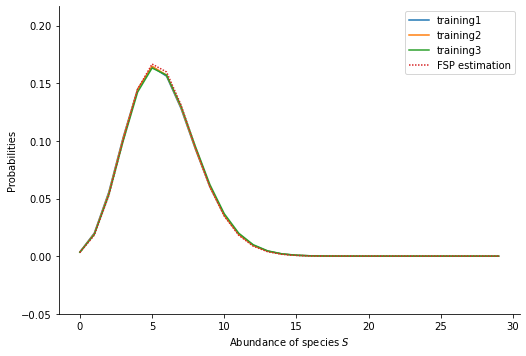

In [8]:
plot.plot_model(to_pred=torch.tensor([15, 3., 2., 1., 0.5, 2.]), 
        models=[model1, model2, model3], 
        up_bound = 30, 
        time_windows = np.array([5, 10, 15, 20]),
        n_comps=N_COMPS,                    
        plot_fsp_result=(True, 
                        propensities.stoich_mat, 
                        propensities.propensities, 
                        propensities.propensities_drv,
                        30, 
                        propensities.init_state, 
                        propensities.ind_species, 
                        1, 
                        1))

## Sensitivity of the likelihood

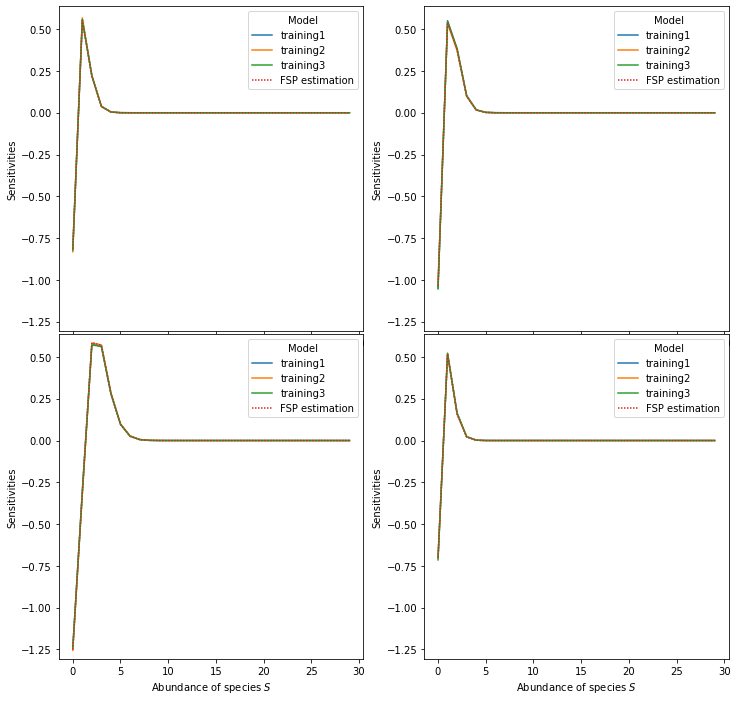

In [9]:
plot.multiple_plots(to_pred=[X_test[k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    index_names = ('Sensitivities', r'Abundance of species $S$'),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    1, 
                                    1),
                    plot=('sensitivities', 0),
                    save=(False, "CRN2_theta1.pdf"))

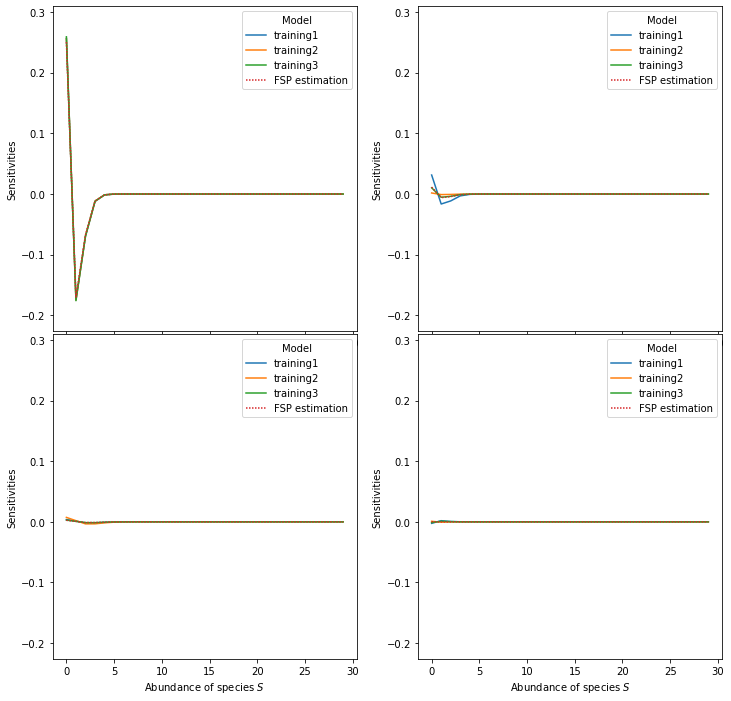

In [10]:
plot.multiple_plots(to_pred=[X_test[k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    index_names = ('Sensitivities', r'Abundance of species $S$'),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    1, 
                                    1),
                    plot=('sensitivities', 1),
                    save=(False, "CRN2_xi1.pdf"))

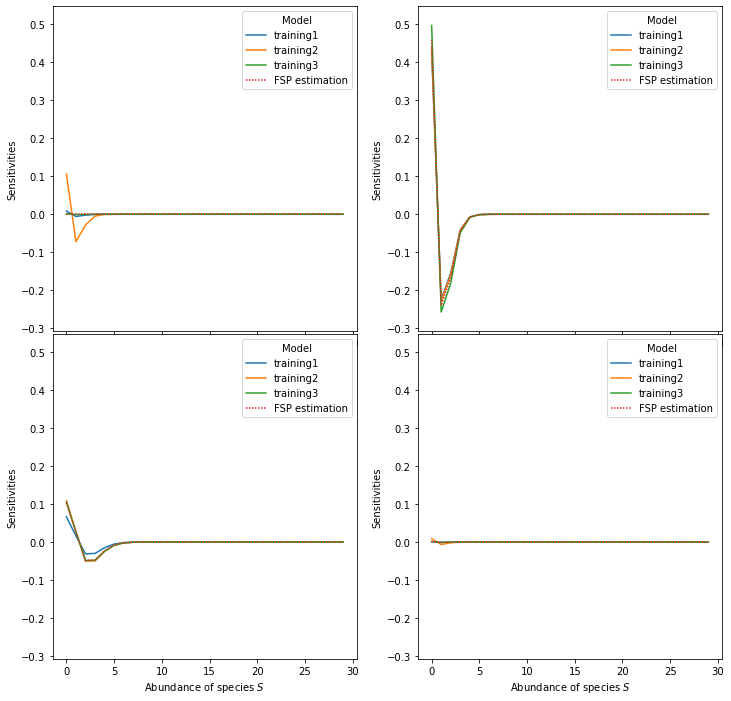

In [11]:
plot.multiple_plots(to_pred=[X_test[k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    index_names = ('Sensitivities', r'Abundance of species $S$'),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    1, 
                                    1),
                    plot=('sensitivities', 2),
                    save=(False, "CRN2_xi2.pdf"))

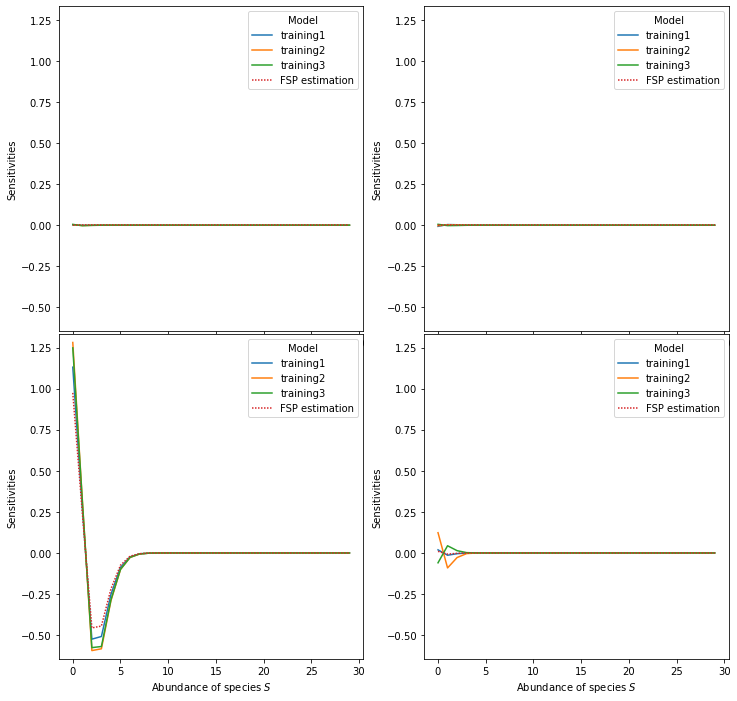

In [12]:
plot.multiple_plots(to_pred=[X_test[k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    index_names = ('Sensitivities', r'Abundance of species $S$'),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    1, 
                                    1),
                    plot=('sensitivities', 3),
                    save=(False, "CRN2_xi3.pdf"))

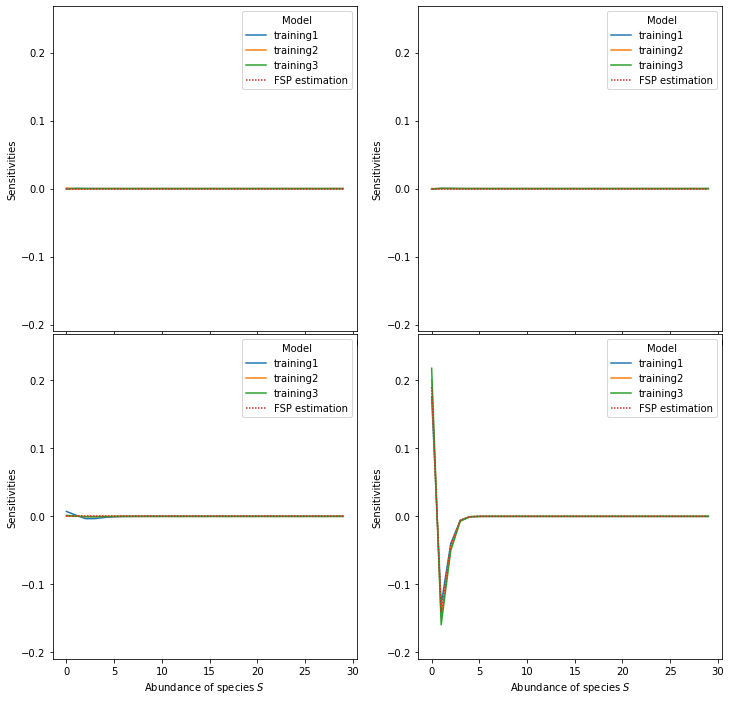

In [13]:
plot.multiple_plots(to_pred=[X_test[k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    index_names = ('Sensitivities', r'Abundance of species $S$'),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    propensities.propensities_drv,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    1, 
                                    1),
                    plot=('sensitivities', 4),
                    save=(False, "CRN2_xi4.pdf"))

## Fisher information

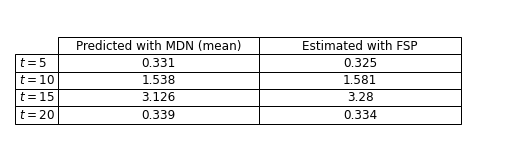

In [14]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=0,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200)

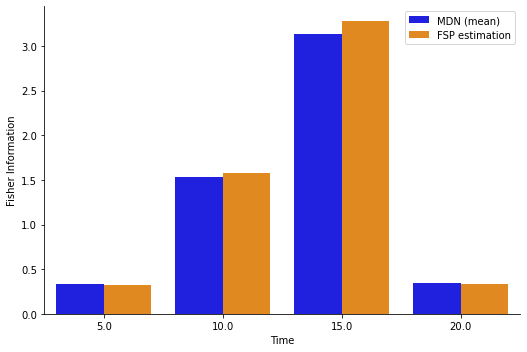

In [15]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=0,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

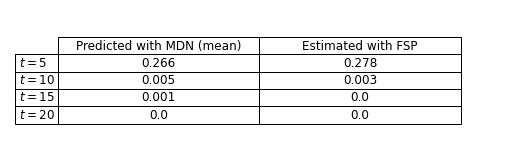

In [16]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=1,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200)

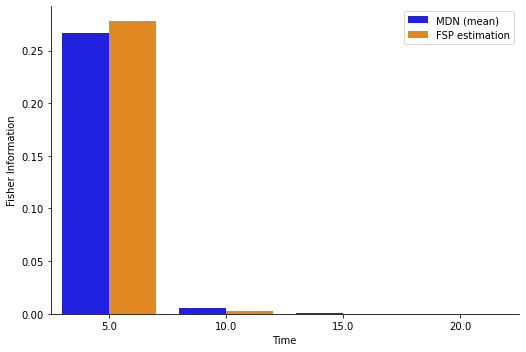

In [17]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=1,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

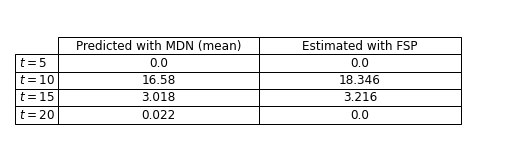

In [18]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=2,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200)

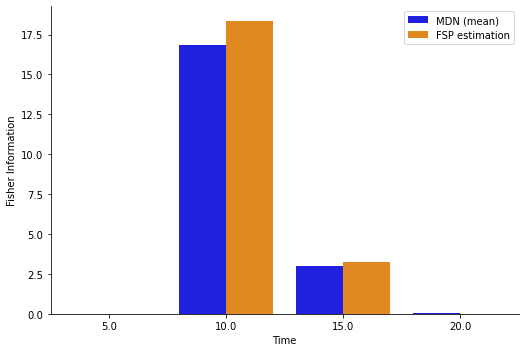

In [19]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=2,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

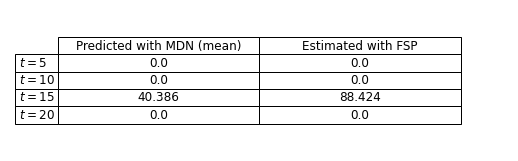

In [20]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=3,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200)

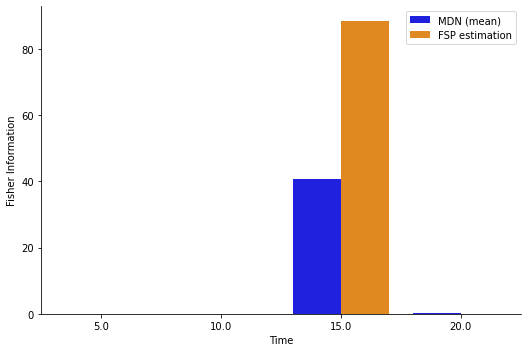

In [21]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=3,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

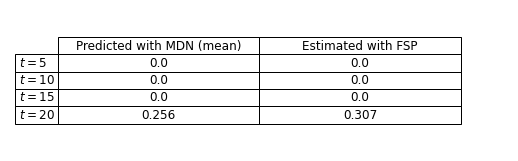

In [22]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=4,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200)

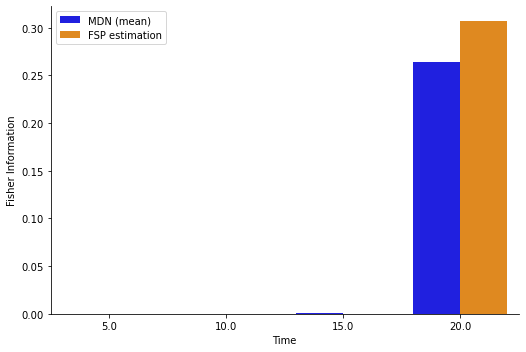

In [23]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=4,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

## Expectation

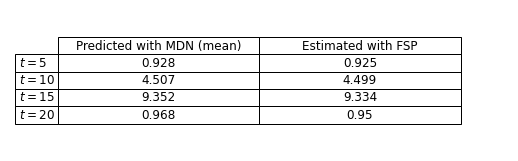

In [24]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=None,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200)

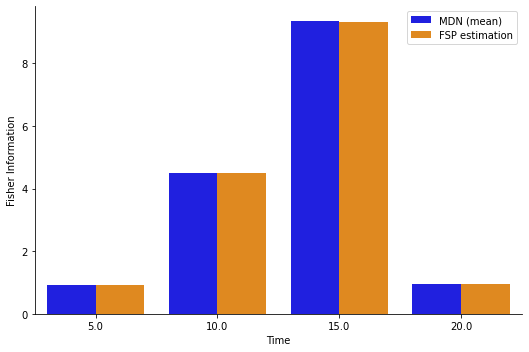

In [25]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=None,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            up_bound=200,
            save=(False, "CRN2_expval_bars.pdf"))

## Gradient of the expectation

In [26]:
def identity(x):
    return x

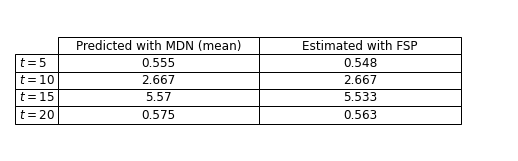

In [27]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 0),
            up_bound=200)

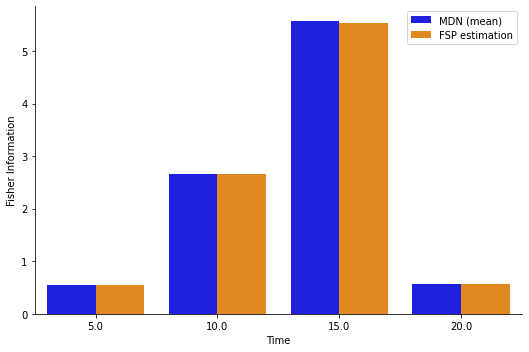

In [28]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 0),
            up_bound=200,
            save=(False, "CRN2_expgrad1_bars.pdf"))

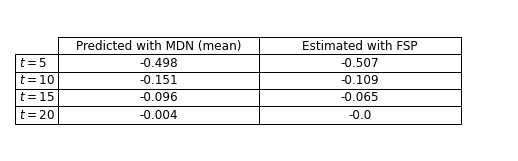

In [29]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 1),
            up_bound=200)

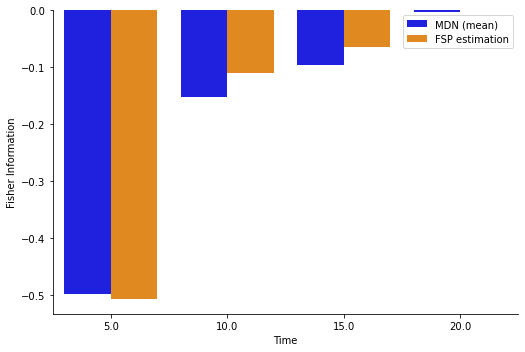

In [30]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 1),
            up_bound=200,
            save=(False, "CRN2_expgrad2_bars.pdf"))

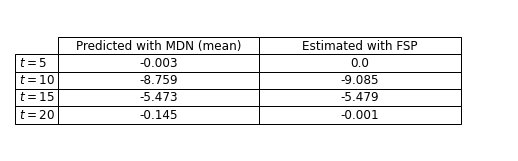

In [31]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 2),
            up_bound=200)

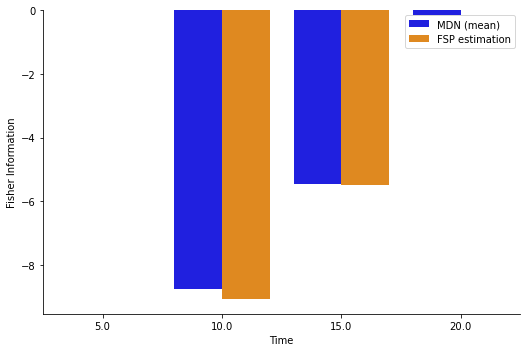

In [32]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 2),
            up_bound=200,
            save=(False, "CRN2_expgrad3_bars.pdf"))

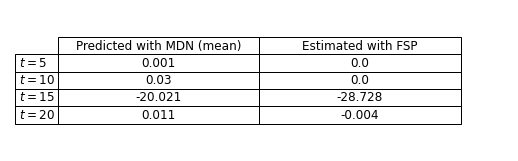

In [33]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 3),
            up_bound=200)

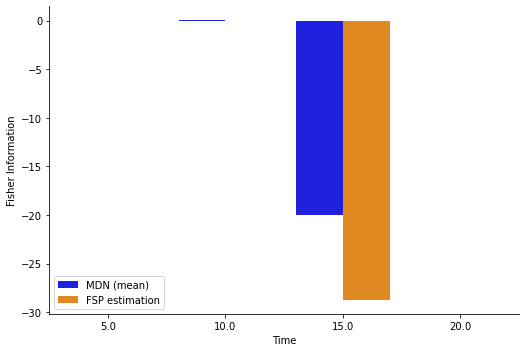

In [34]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 3),
            up_bound=200,
            save=(False, "CRN2_expgrad4_bars.pdf"))

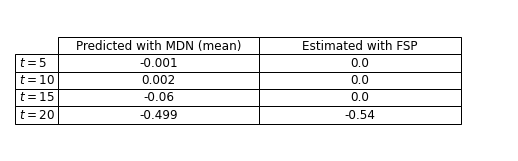

In [35]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 4),
            up_bound=200)

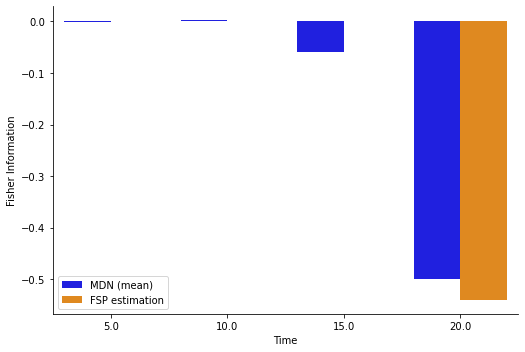

In [36]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            loss=identity,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            1, 
                            1),
            plot=('gradient', 4),
            up_bound=200,
            save=(False, "CRN2_expgrad5_bars.pdf"))

## Stochastic control of the Chemical Reaction Network

In [6]:
def loss05(x):
    return (x-0.5)**2

def loss1(x):
    return (x-1)**2

def loss2(x):
    return (x-2)**2

def loss3(x):
    return (x-3)**2

def loss4(x):
    return (x-4)**2

In [7]:
def grad_loss1(x, grad_x):
    return 2*grad_x*(x-1)

def grad_loss2(x, grad_x):
    return 2*grad_x*(x-2)

def grad_loss3(x, grad_x):
    return 2*grad_x*(x-3)

def grad_loss4(x, grad_x):
    return 2*grad_x*x

In [8]:
crn = simulation.CRN(stoichiometry_mat=propensities.stoich_mat,
                    propensities=propensities.propensities,
                    init_state=propensities.init_state,
                    n_fixed_params=1,
                    n_control_params=1,
                    seed=0)
domain = np.stack([np.array([1e-5, 5.])]*4)
fixed_params = np.array([2.])
time_windows=np.array([5, 10, 15, 20])

### Constant targets

Optimising ...:   0%|          | 0/20000 [00:00<?, ?it/s]

Optimising ...:  16%|█▌        | 3214/20000 [00:51<04:31, 61.91it/s]


Time:  51.995156049728394
Number of iterations:  3214
Control parameters:  [2.00161479 1.99875279 2.01189258 2.01267341]
Final loss:  1.0416787077360823e-07


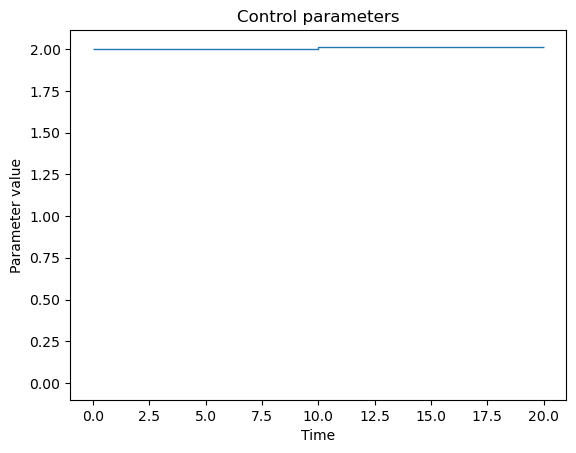

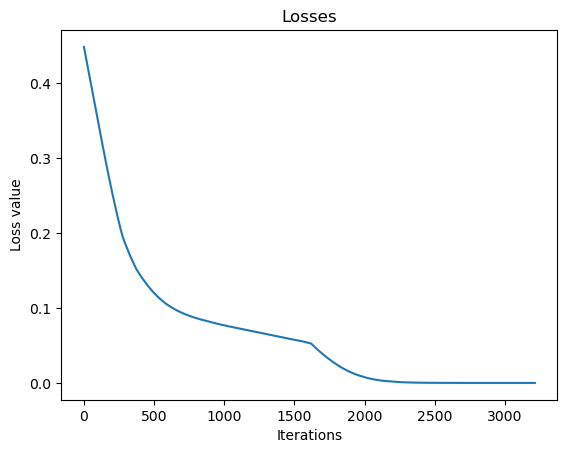

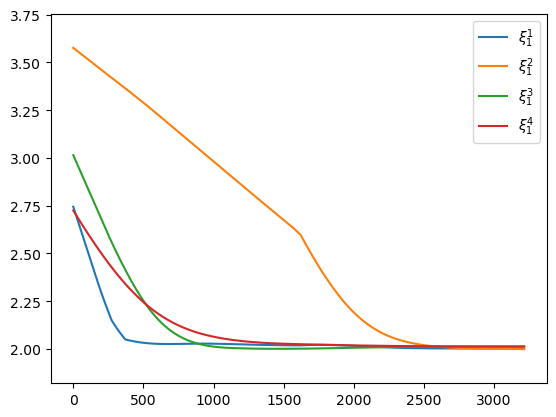

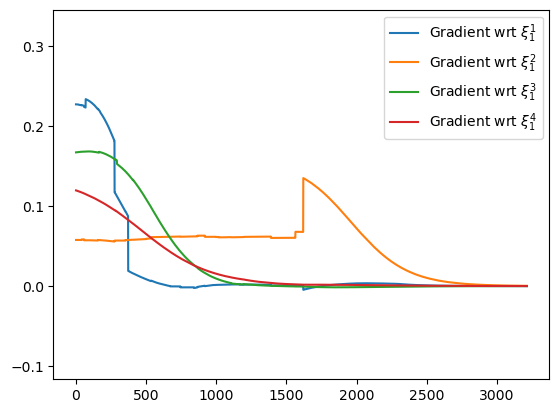

Final exact loss:  0.00043409999999999976


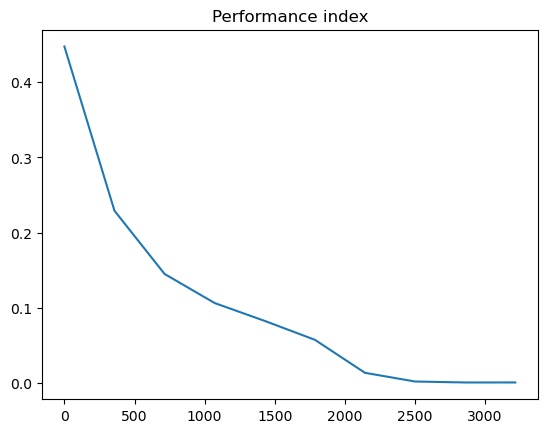

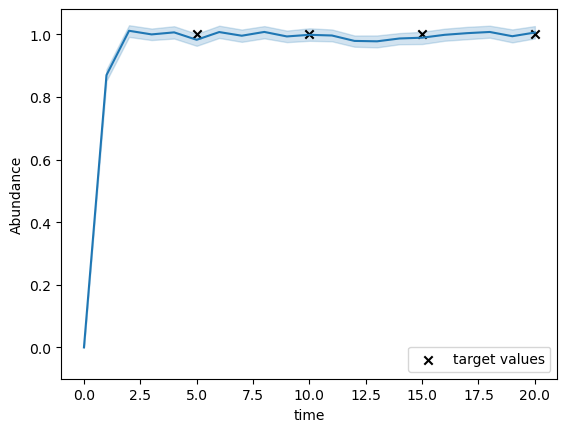

In [11]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss1,
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.], [10., 1.], [15., 1.], [20., 1.]]),
                    crn_name='ctrl_pureprod',
                    save=(False, ['gradient_descent/MDN/constant_targets/target1/control_values', 
                                'gradient_descent/MDN/constant_targets/target1/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target1/parameters', 
                                'gradient_descent/MDN/constant_targets/target1/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target1/real_losses', 
                                'gradient_descent/MDN/constant_targets/target1/exp_results']))

Optimising ...:   0%|          | 0/20000 [00:00<?, ?it/s]

Optimising ...:   2%|▏         | 324/20000 [00:04<04:43, 69.49it/s]


Time:  4.713997840881348
Number of iterations:  324
Control parameters:  [0.99692828 0.99654727 1.00040022 0.99755689]
Final loss:  9.685905411060958e-09


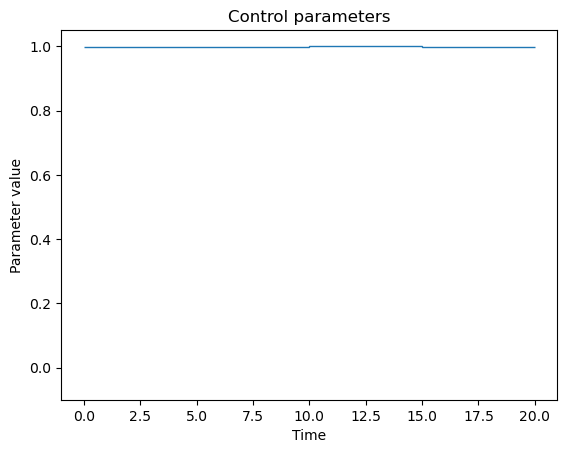

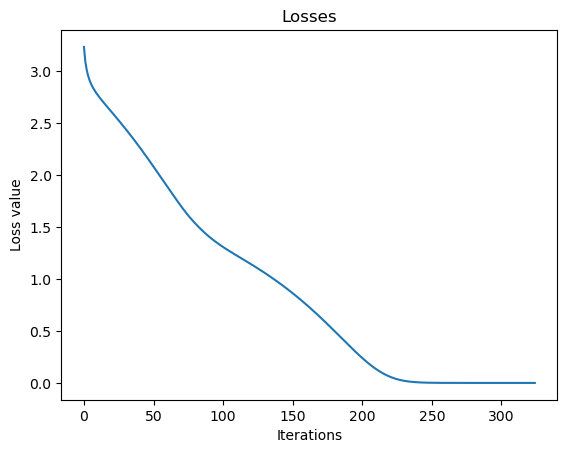

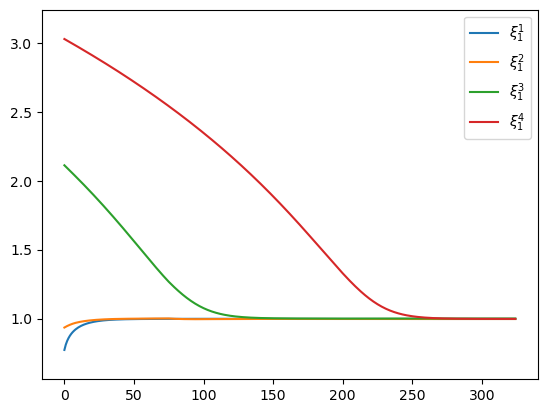

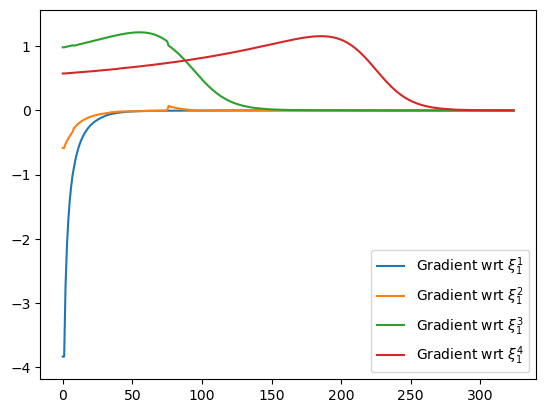

Optimising ...:   5%|▌         | 1077/20000 [00:29<04:38, 67.98it/s]

Final exact loss:  0.0007786199999999943


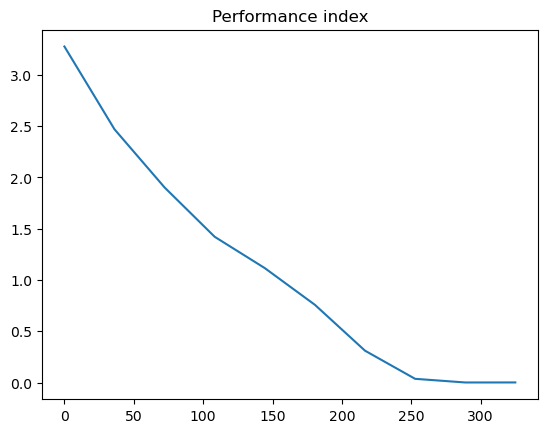

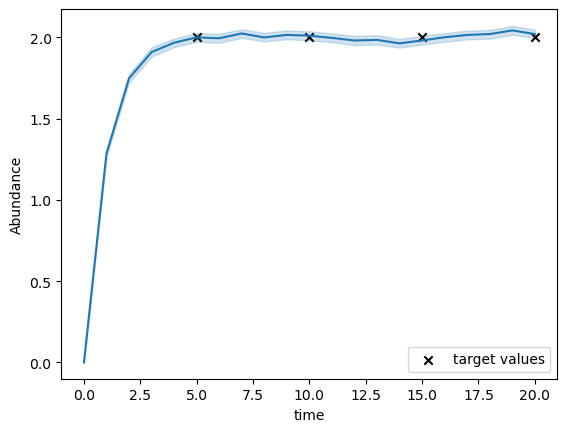

In [13]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss2,
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 2.], [10., 2.], [15., 2.], [20., 2.]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/constant_targets/target2/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target2/control_values', 
                                'gradient_descent/MDN/constant_targets/target2/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target2/parameters', 
                                'gradient_descent/MDN/constant_targets/target2/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target2/real_losses', 
                                'gradient_descent/MDN/constant_targets/target2/exp_results']))

Optimising ...:   3%|▎         | 667/20000 [00:05<02:40, 120.66it/s]


Time:  5.8797619342803955
Number of iterations:  667
Control parameters:  [0.6567675  0.66114236 0.67009351 0.6632226 ]
Final loss:  5.371703082346357e-10


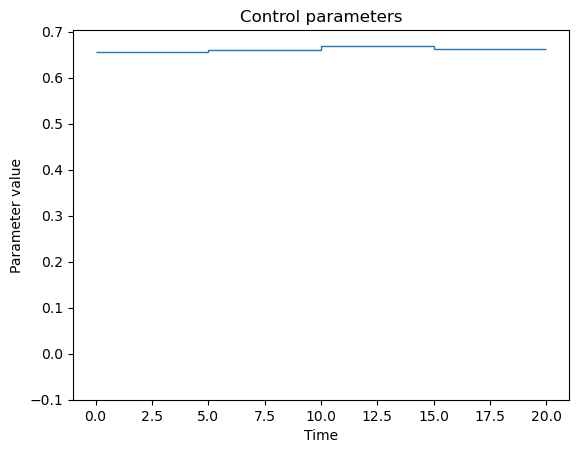

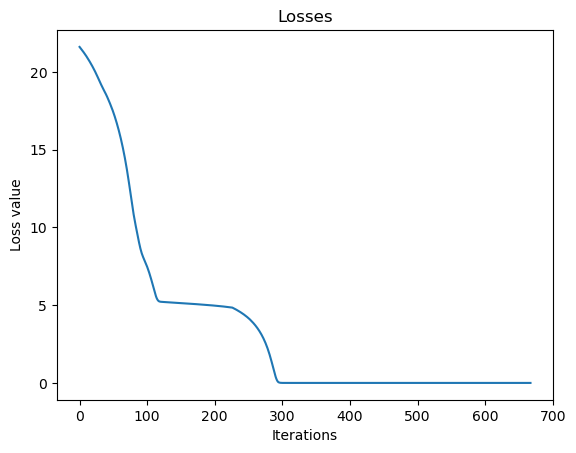

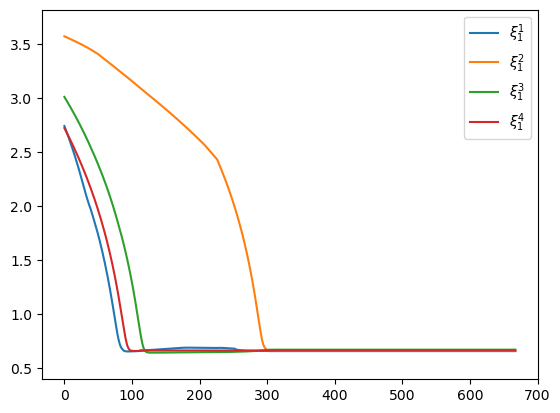

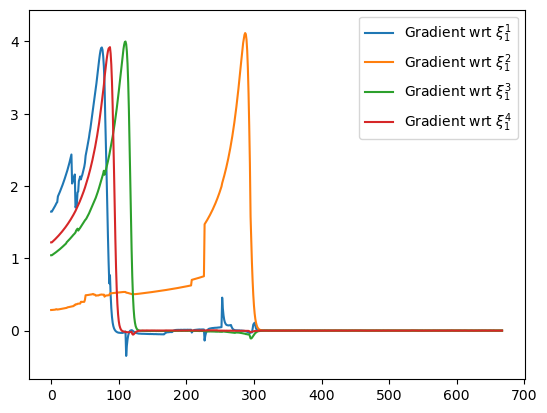

Final exact loss:  0.0072845200000000105


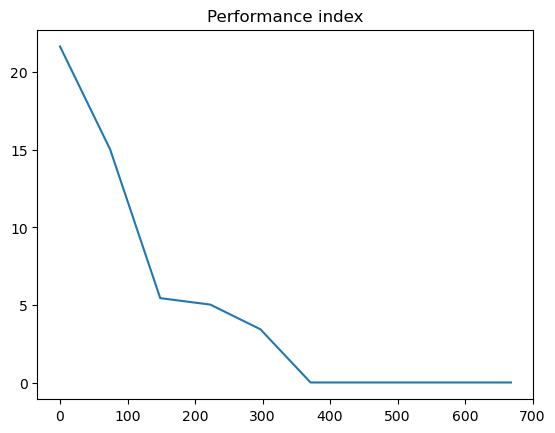

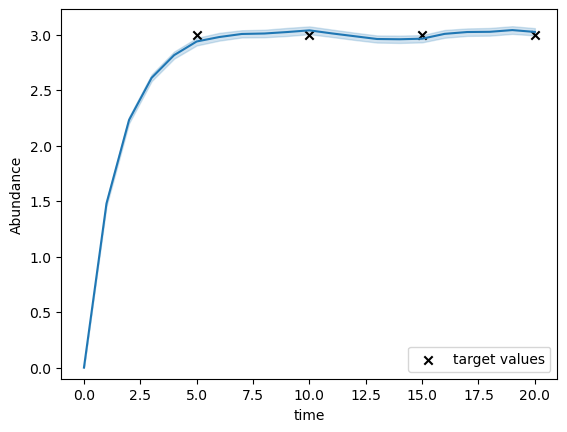

In [9]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss3,
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 3.], [10., 3.], [15., 3.], [20., 3.]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/constant_targets/target3/',
                    save=(False, ['gradient_descent/MDN/constant_targets/target3/control_values', 
                                'gradient_descent/MDN/constant_targets/target3/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target3/parameters', 
                                'gradient_descent/MDN/constant_targets/target3/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target3/real_losses', 
                                'gradient_descent/MDN/constant_targets/target3/exp_results']))

Optimising ...:   0%|          | 0/20000 [00:00<?, ?it/s]

Optimising ...:  53%|█████▎    | 10597/20000 [01:44<01:33, 101.01it/s]


Time:  104.95824790000916
Number of iterations:  10597
Control parameters:  [0.44487703 0.50913199 0.50801467 0.50201043]
Final loss:  2.8677504815277644e-10


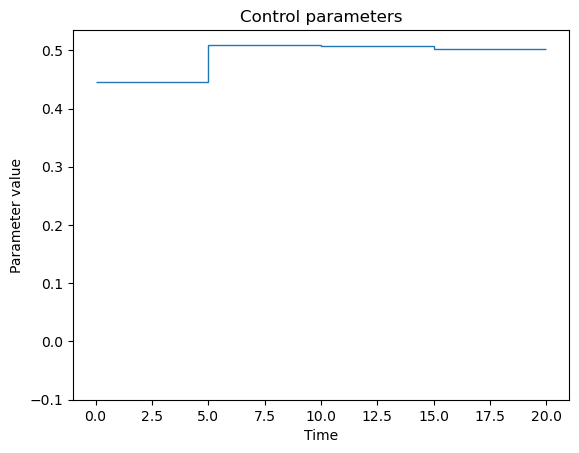

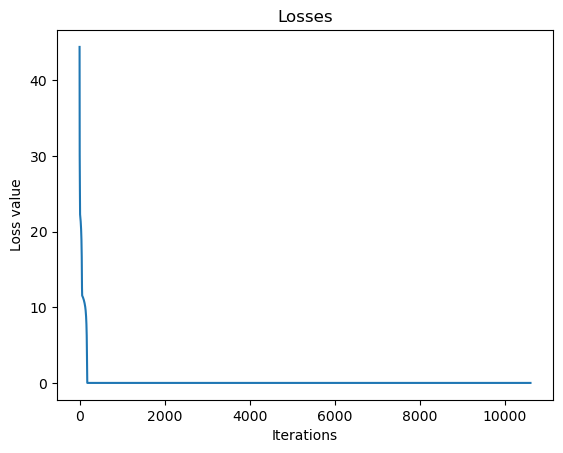

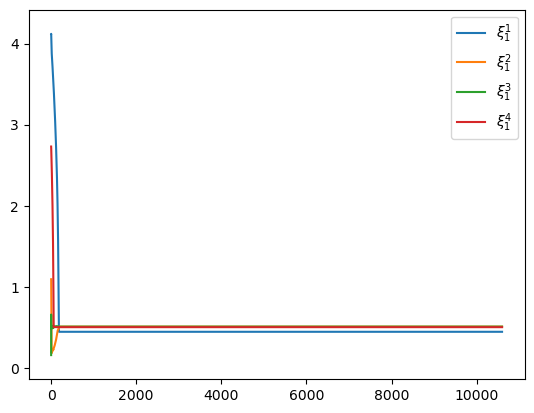

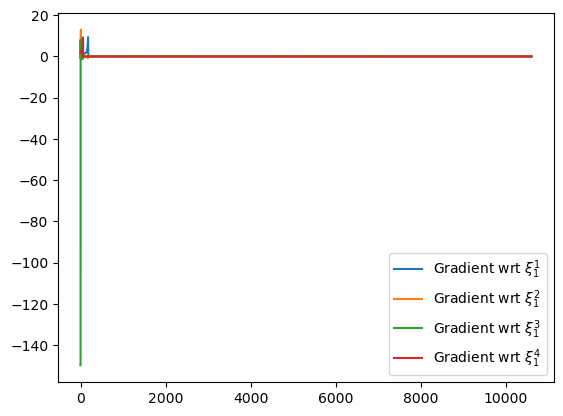

Final exact loss:  0.015493390000000017


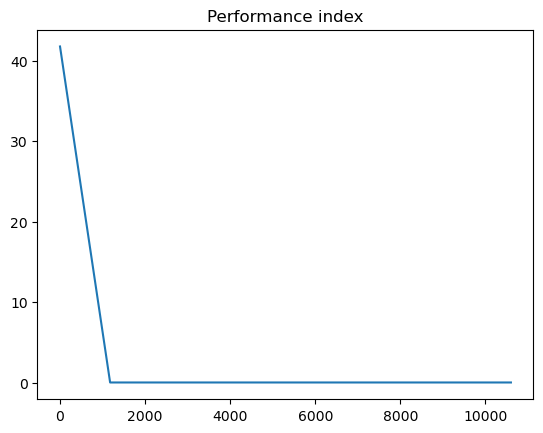

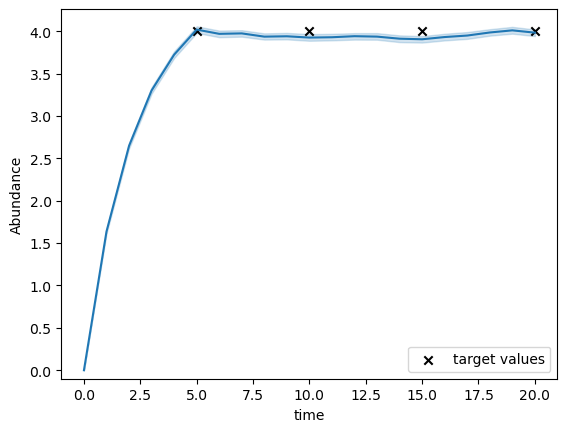

In [15]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss4,
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 4], [10., 4], [15., 4], [20., 4]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/constant_targets/target4/',                    
                    save=(False, ['gradient_descent/MDN/constant_targets/target4/control_values', 
                                'gradient_descent/MDN/constant_targets/target4/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target4/parameters', 
                                'gradient_descent/MDN/constant_targets/target4/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target4/real_losses', 
                                'gradient_descent/MDN/constant_targets/target4/exp_results']))

### Varying targets

Optimising ...:  15%|█▍        | 2977/20000 [00:28<02:42, 104.71it/s]


Time:  28.66582989692688
Number of iterations:  2977
Control parameters:  [2.00432016 0.99680958 0.99743544 0.65824447]
Final loss:  6.606229874250857e-08


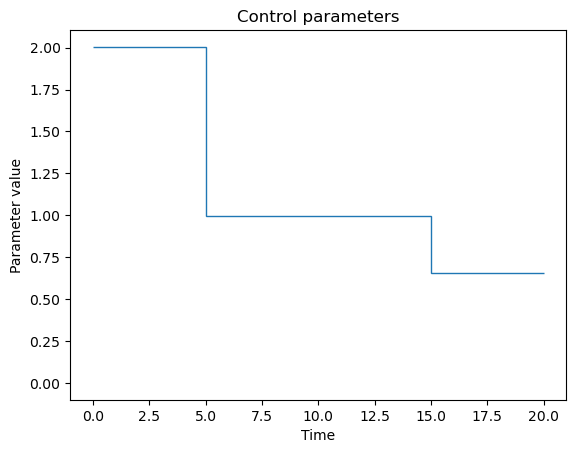

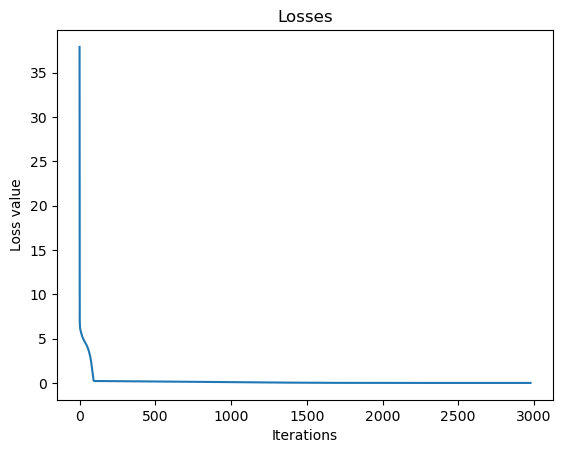

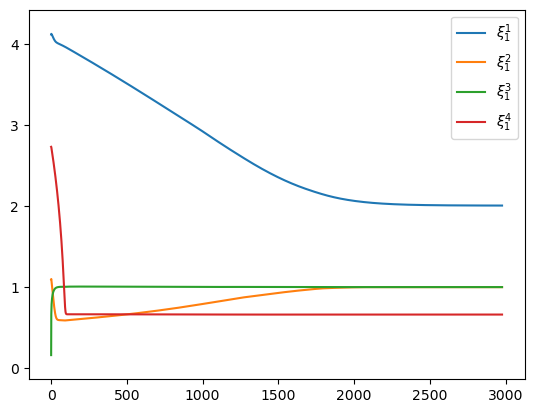

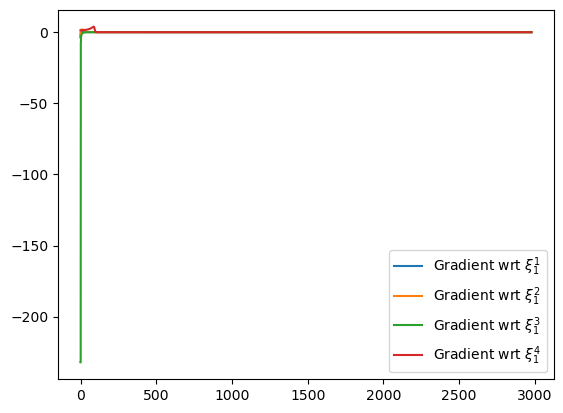

Final exact loss:  0.0007486600000000047


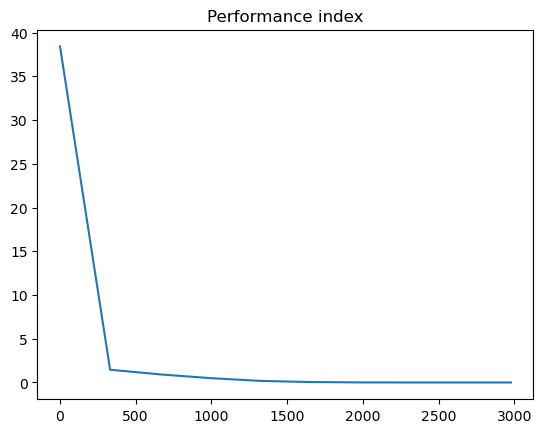

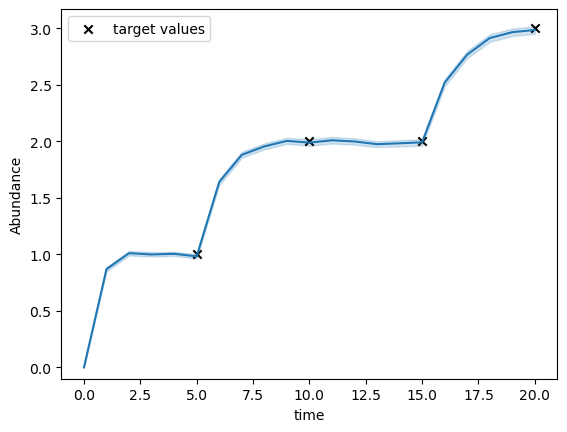

In [16]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss1, loss2, loss2, loss3],
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.], [10., 2.], [15., 2.], [20., 3.]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/varying_targets/target1223/',                    
                    save=(False, ['gradient_descent/MDN/varying_targets/target1223/control_values', 
                                'gradient_descent/MDN/varying_targets/target1223/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target1223/parameters', 
                                'gradient_descent/MDN/varying_targets/target1223/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target1223/real_losses', 
                                'gradient_descent/MDN/varying_targets/target1223/exp_results']))

Optimising ...:   0%|          | 0/20000 [00:00<?, ?it/s]

Optimising ...:   6%|▌         | 1248/20000 [00:12<03:08, 99.37it/s] 


Time:  12.582260131835938
Number of iterations:  1248
Control parameters:  [0.66232533 0.99016112 1.98656869 0.65613563]
Final loss:  5.030773309044889e-08


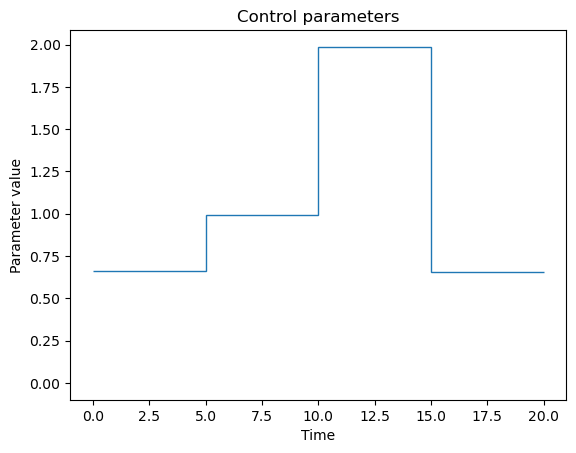

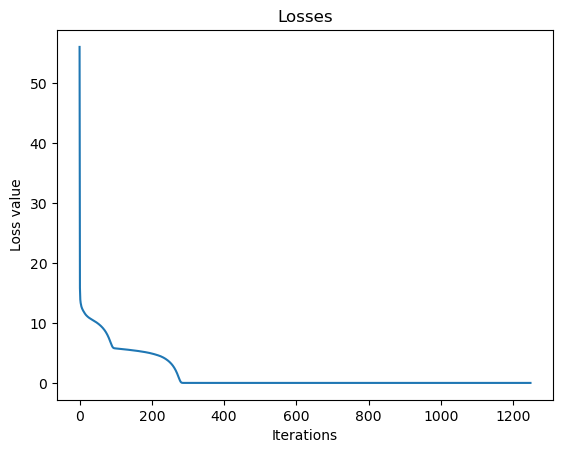

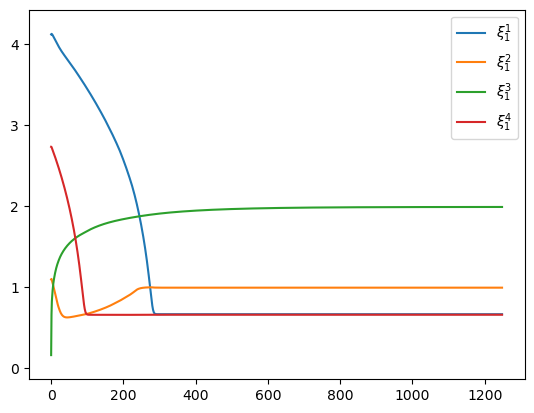

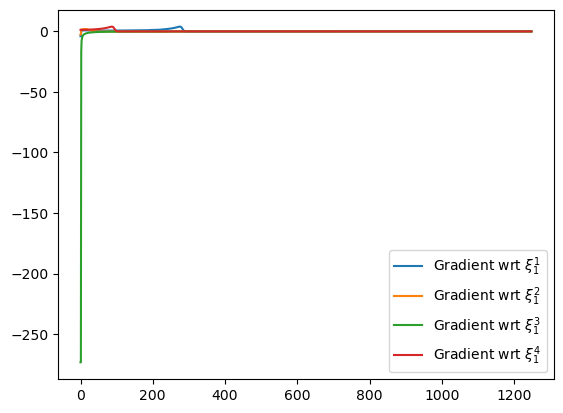

Final exact loss:  0.009247180000000042


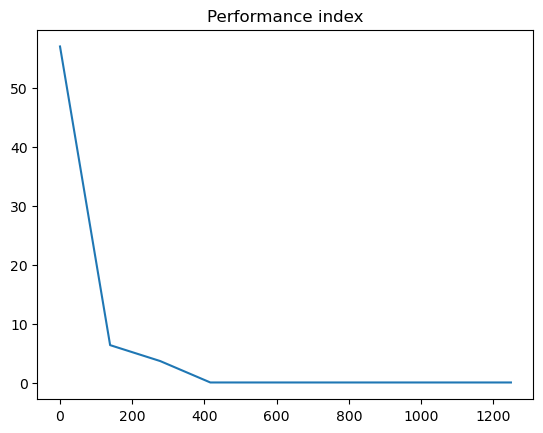

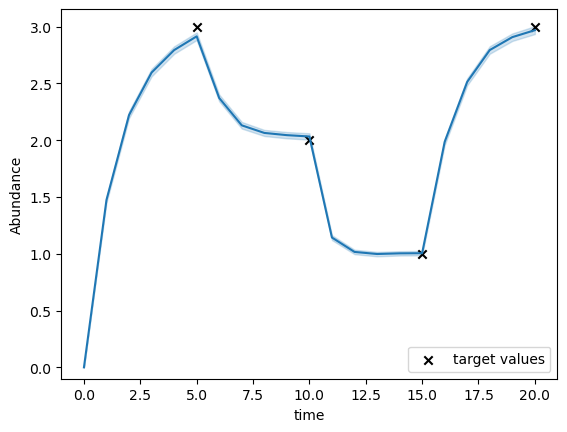

In [17]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss3, loss2, loss1, loss3],
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 3.], [10., 2.], [15., 1.], [20., 3.]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/varying_targets/target3213/',                    
                    save=(False, ['gradient_descent/MDN/varying_targets/target3213/control_values', 
                                'gradient_descent/MDN/varying_targets/target3213/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target3213/parameters', 
                                'gradient_descent/MDN/varying_targets/target3213/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target3213/real_losses', 
                                'gradient_descent/MDN/varying_targets/target3213/exp_results']))

Optimising ...:   0%|          | 6/30000 [00:00<11:40, 42.80it/s]

Optimising ...:  60%|██████    | 18087/30000 [02:59<01:58, 100.66it/s]


Time:  179.7751121520996
Number of iterations:  18087
Control parameters:  [0.66174182 0.98304773 2.00240862 4.07936124]
Final loss:  1.7330299684203965e-07


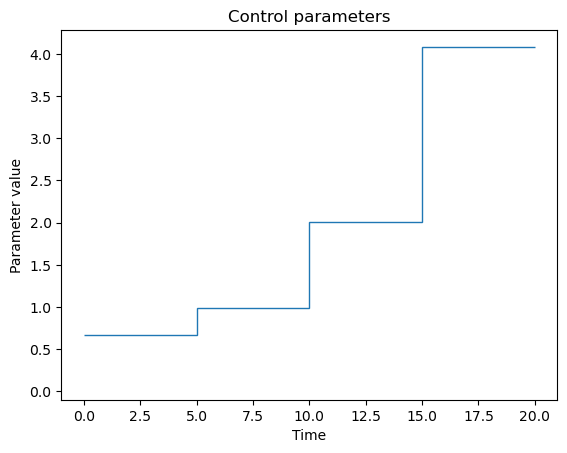

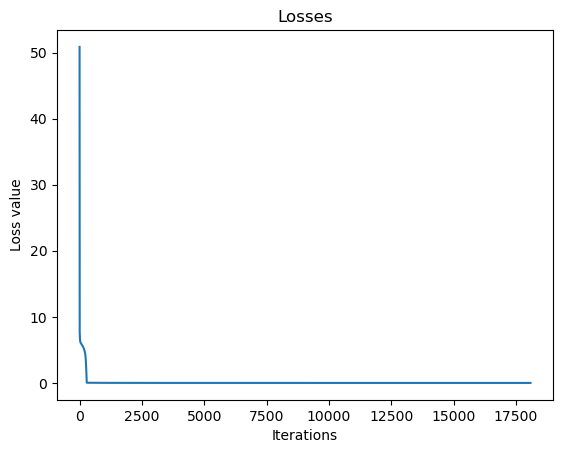

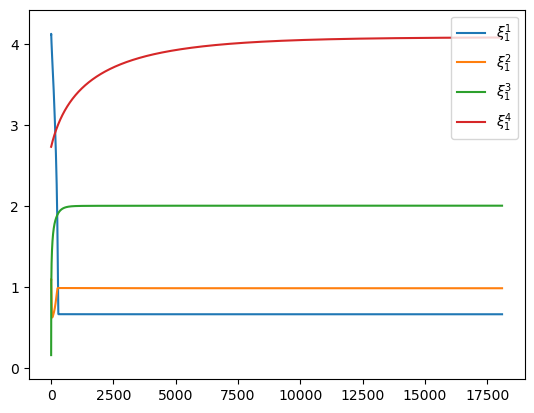

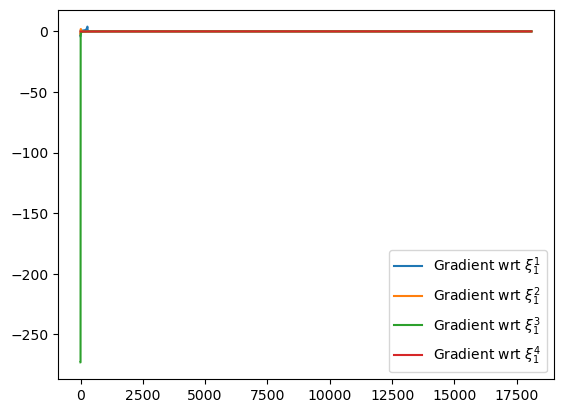

Final exact loss:  0.009233820000000047


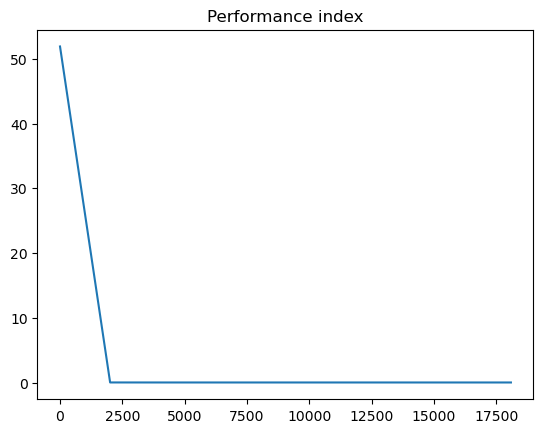

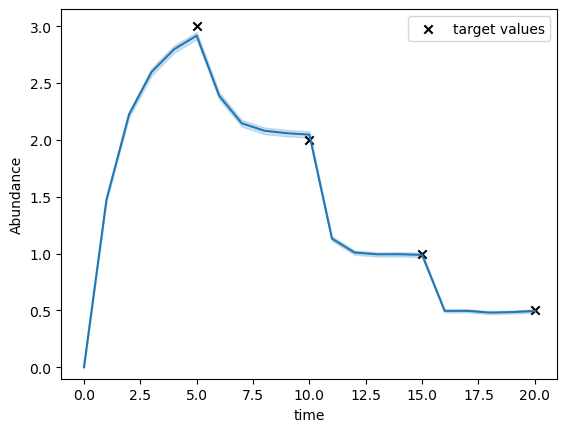

In [18]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss3, loss2, loss1, loss05],
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 3.], [10., 2.], [15., 1.], [20., 0.5]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/varying_targets/target32105/',                    
                    save=(False, ['gradient_descent/MDN/varying_targets/target32105/control_values', 
                                'gradient_descent/MDN/varying_targets/target32105/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target32105/parameters', 
                                'gradient_descent/MDN/varying_targets/target32105/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target32105/real_losses', 
                                'gradient_descent/MDN/varying_targets/target32105/exp_results']))

Optimising ...:   0%|          | 0/20000 [00:00<?, ?it/s]

Optimising ...:   9%|▊         | 1718/20000 [00:16<02:55, 103.99it/s]


Time:  16.56210207939148
Number of iterations:  1718
Control parameters:  [0.67033453 1.95974488 0.64288503 2.00822751]
Final loss:  7.597772366807476e-08


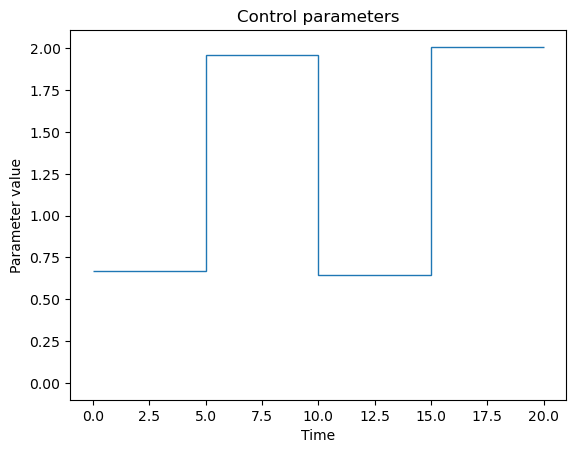

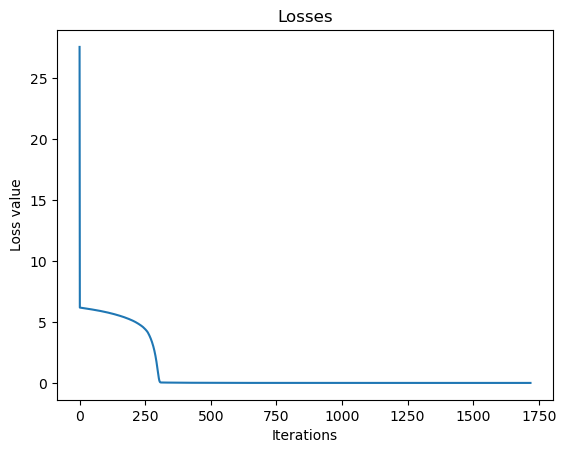

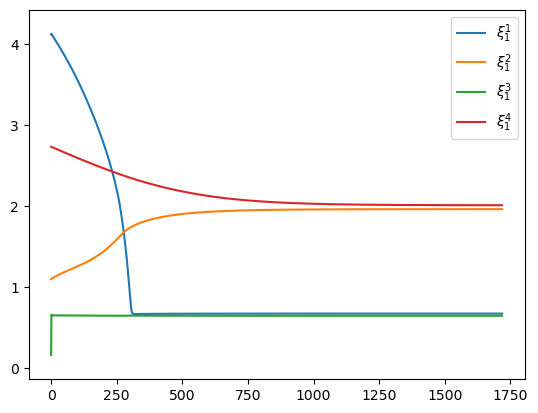

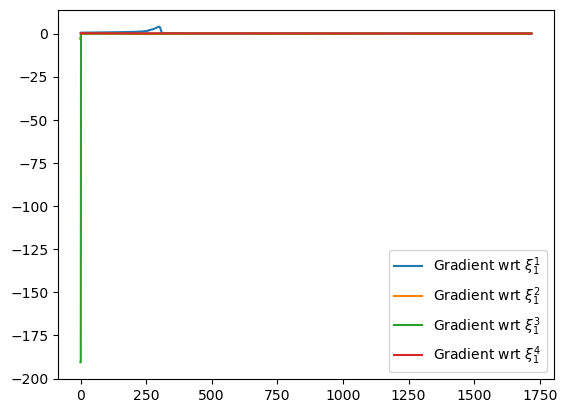

Final exact loss:  0.015460320000000019


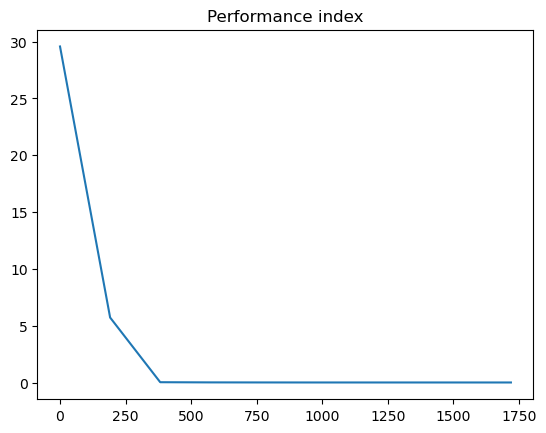

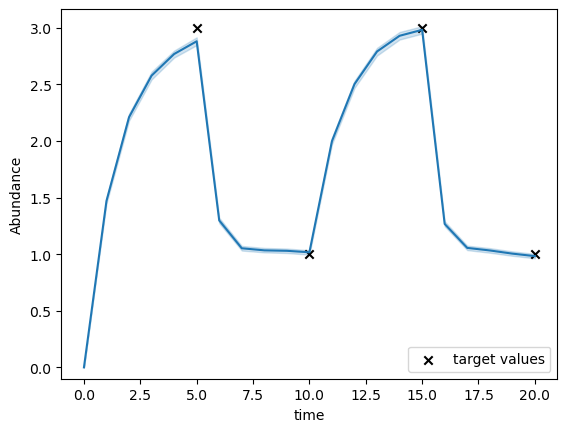

In [19]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss3, loss1, loss3, loss1],
                    gamma=0.01,
                    n_iter=20_000,
                    eps=1e-7,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 3], [10., 1.], [15., 3.], [20., 1.]]),
                    crn_name='ctrl_pureprod',
                    directory='gradient_descent/MDN/varying_targets/target3131/',                    
                    save=(False, ['gradient_descent/MDN/varying_targets/target3131/control_values', 
                                'gradient_descent/MDN/varying_targets/target3131/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target3131/parameters', 
                                'gradient_descent/MDN/varying_targets/target3131/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target3131/real_losses', 
                                'gradient_descent/MDN/varying_targets/target3131/exp_results']))